# Calculating relative errors

The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

`attrition_pop` and `mean_attrition_pop` (the mean of the `Attrition` column of `attrition_pop`) are available; `pandas` is loaded as pd.

In [1]:
# # Generate a simple random sample of 50 rows, with seed 2022
# attrition_srs50 = attrition_pop.sample(n = 50, random_state = 2022)

# # Calculate the mean employee attrition in the sample
# mean_attrition_srs50 = attrition_srs50["Attrition"].mean()

# # Calculate the relative error percentage
# rel_error_pct50 = 100 * abs(mean_attrition_pop - mean_attrition_srs50)/mean_attrition_pop

# # Print rel_error_pct50
# print(rel_error_pct50)

In [2]:
# # Generate a simple random sample of 100 rows, with seed 2022
# attrition_srs100 = attrition_pop.sample(n = 100, random_state = 2022)

# # Calculate the mean employee attrition in the sample
# mean_attrition_srs100 = attrition_srs100["Attrition"].mean()

# # Calculate the relative error percentage
# rel_error_pct100 = 100 * abs(mean_attrition_srs100 - mean_attrition_pop)/mean_attrition_pop

# # Print rel_error_pct100
# print(rel_error_pct100)

# Relative error vs. sample size

The plot shows the relative error in the proportion of employee attritions, using simple random sampling, for sample sizes from 2 to 1470 (the size of the population).

Clicking "Regenerate plot" will select new samples for each sample size, and calculate the relative errors again.

<center><img src="images/03.03.png"  style="width: 400px, height: 300px;"/></center>

Which statement about relative errors and sample sizes is true?

- For small sample sizes, each additional entry in a sample can result in substantial decreases to the relative error.


# Replicating samples

When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.

`attrition_pop` is available; `pandas` and `matplotlib.pyplot` are loaded with their usual aliases.

In [3]:
# # Create an empty list
# mean_attritions = []
# # Loop 500 times to create 500 sample means
# for i in range(500):
# 	mean_attritions.append(
#     	attrition_pop.sample(n=60)['Attrition'].mean()
# 	)

# # Create a histogram of the 500 sample means
# plt.hist(mean_attritions, bins = 16)
# plt.show()

# Replication parameters

The dashboard shows a histogram of sample mean proportions of employee attrition. There are two parameters: the size of each simple random sample, and the number of replicates. It's important to understand how each of these parameters affects the result. Use the parameter sliders to explore different values and note their effect on the histogram.

Which statement about the effect of each parameter on the distribution of sample means is true?

<center><img src="images/03.061.jpg"  style="width: 400px, height: 300px;"/></center>
<center><img src="images/03.062.jpg"  style="width: 400px, height: 300px;"/></center>
<center><img src="images/03.063.jpg"  style="width: 400px, height: 300px;"/></center>
<center><img src="images/03.064.jpg"  style="width: 400px, height: 300px;"/></center>


- As the sample size increases, the range of calculated sample means tends to decrease.
- As sample size increases, on average each sample mean has a lower relative error compared to the population mean, thus reducing the range of the distribution.

# Exact sampling distribution

To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.

The distribution of a sample statistic is called the sampling distribution. When we can calculate this exactly, rather than using an approximation, it is known as the exact sampling distribution.

Let's take another look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. (These have the numbers one to eight.)

pandas, numpy, and matplotlib.pyplot are loaded with their usual aliases. The `expand_grid()` function is also available, which expects a dictionary of key-value pairs as its argument. The definition of the `expand_grid()` function is provided in the pandas documentation.

       die1  die2  die3  die4  die5
0         1     1     1     1     1
1         1     1     1     1     2
2         1     1     1     1     3
3         1     1     1     1     4
4         1     1     1     1     5
...     ...   ...   ...   ...   ...
32763     8     8     8     8     4
32764     8     8     8     8     5
32765     8     8     8     8     6
32766     8     8     8     8     7
32767     8     8     8     8     8

[32768 rows x 5 columns]


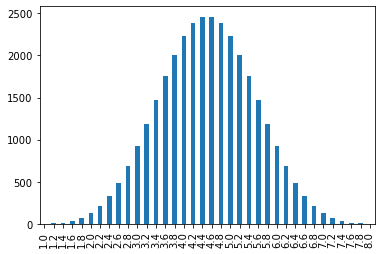

In [7]:
import pandas as pd
import matplotlib.pyplot as plt 

# Expand a grid representing 5 8-sided dice
from itertools import product

die1 = die2 = die3 = die4 = die5 = [1,2,3,4,5,6,7,8]

dice = pd.DataFrame(list(product(die1, die2, die3, die4, die5 )), columns=['die1', 'die2', 'die3', 'die4', 'die5'])

# Print the result
print(dice)

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind = "bar")
plt.show()

# Generating an approximate sampling distribution

Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is 8**5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

pandas, numpy, and matplotlib.pyplot are loaded with their usual aliases.

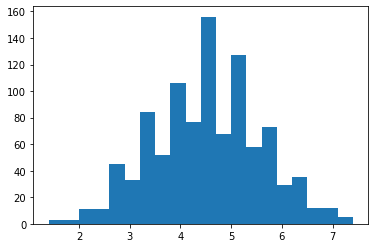

In [9]:
import numpy as np
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins = 20)
plt.show()

# Exact vs. approximate

You've seen two types of sampling distribution now (exact and approximate). It's really important to understand when each should be computed.

Should we always be able to compute the exact sampling distribution directly?
- No, the computational time and resources needed to look at the population of values could be too much for our problem.

# Population & sampling distribution means

One of the useful features of sampling distributions is that you can quantify them. Specifically, you can calculate summary statistics on them. Here, you'll look at the relationship between the mean of the sampling distribution and the population parameter's mean.

Three sampling distributions are provided. For each, the employee attrition dataset was sampled using simple random sampling, then the mean attrition was calculated. This was done 1000 times to get a sampling distribution of mean attritions. One sampling distribution used a sample size of 5 for each replicate, one used 50, and one used 500.

`attrition_pop`, `sampling_distribution_5`, `sampling_distribution_50`, and `sampling_distribution_500` are available; `numpy` as `np` is loaded.

In [10]:
# # Calculate the mean of the mean attritions for each sampling distribution
# mean_of_means_5 = np.mean(sampling_distribution_5)
# mean_of_means_50 = np.mean(sampling_distribution_50)
# mean_of_means_500 = np.mean(sampling_distribution_500)

# # Print the results
# print(mean_of_means_5)
# print(mean_of_means_50)
# print(mean_of_means_500)

How does sample size affect the mean of the sample means?
- Regardless of sample size, the mean of the sampling distribution is a close approximation to the population mean.

# Population & sampling distribution variation

You just calculated the mean of the sampling distribution and saw how it is an estimate of the corresponding population parameter. Similarly, as a result of the central limit theorem, the standard deviation of the sampling distribution has an interesting relationship with the population parameter's standard deviation and the sample size.

`attrition_pop`, `sampling_distribution_5`, `sampling_distribution_50`, and `sampling_distribution_500` are available; `numpy` is loaded with its usual alias.

In [11]:
# # Calculate the std. dev. of the mean attritions for each sampling distribution
# sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)
# sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)
# sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)

# # Print the results
# print(sd_of_means_5)
# print(sd_of_means_50)
# print(sd_of_means_500)

How are the standard deviations of the sampling distributions related to the population standard deviation and the sample size?
- The standard deviation of the sampling distribution is approximately equal to the population standard deviation divided by the square root of the sample size.